In [2]:
import numpy as np
import pandas as pd

In [3]:
crop = pd.read_csv("crop.csv")
crop.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [4]:
crop=crop.drop(['Unnamed: 8'], axis=1)
crop=crop.drop(['Unnamed: 9'], axis=1)
crop.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop.duplicated().sum()

0

In [9]:
crop.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
#Encoding
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [12]:
crop

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [13]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [14]:
#Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

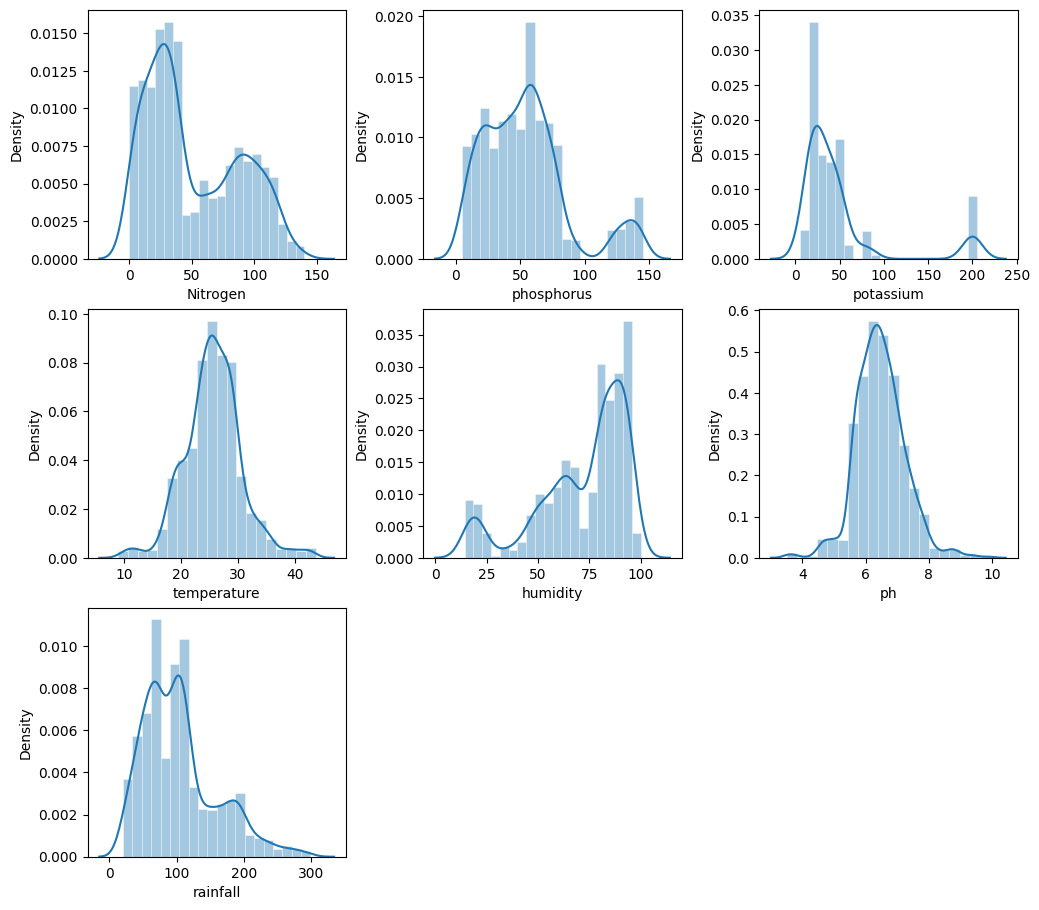

In [15]:
plt.figure(1, figsize=(12,11))
n = 0 
for x in ['Nitrogen','phosphorus','potassium','temperature','humidity','ph','rainfall']:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.2, wspace=0.3)
    sns.histplot(crop[x],bins=20, kde=True,stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

In [16]:
#Splitting of data for Training and Testing
x = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [17]:
x

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [18]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [21]:
# Variables for Accuracy and Models
acc = []
model = []

In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(criterion='gini', n_estimators=45, random_state=27, max_depth=5,oob_score=True)
RandomForest.fit(x_train, y_train)

#checking oob_score
RandomForest.oob_score_

0.9517045454545454

In [31]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [32]:
grid_search.best_score_

0.9937500000000001

In [33]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [35]:
RandomForest = RandomForestClassifier(criterion='gini', n_estimators=10, random_state=42, max_depth=10,min_samples_leaf=5, oob_score=True)
RandomForest.fit(x_train, y_train)

E:\Downloads\Python\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [36]:
y_pred = RandomForest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)
acc.append(accuracy)
model.append('Random Forest')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

Accuracy: 98.4090909090909
Classification report:
               precision    recall  f1-score   support

           1       0.72      1.00      0.84        18
           2       1.00      1.00      1.00        19
           3       1.00      0.76      0.86        29
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        23
          17       1.00      1

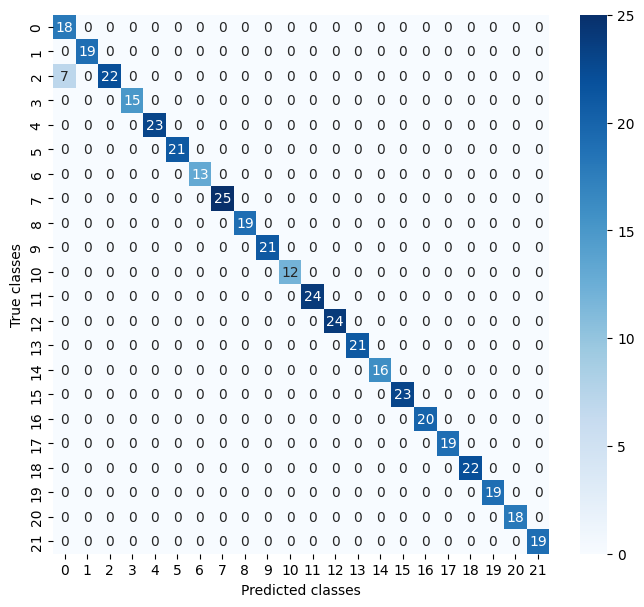

In [37]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

In [51]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall]])
    transformed_features = ms.fit_transform(features)
    prediction = RandomForest.predict(transformed_features)
    print(prediction)
    return prediction[0]

In [52]:
# new inputs
Nitrogen = 67
phosphorus= 45
potassium = 38
temperature = 22.727910
humidity = 82.170688
ph = 7.300411	
rainfall=100

predict = recommendation(Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[20]
Kidneybeans is a best crop to be cultivated 


E:\Downloads\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
